In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import squarify
from collections import Counter

# Load cleaned data
df = pd.read_csv("data/processed/104_swe_jobs_clean.csv")

# Set Seaborn theme
sns.set_theme(style="whitegrid")

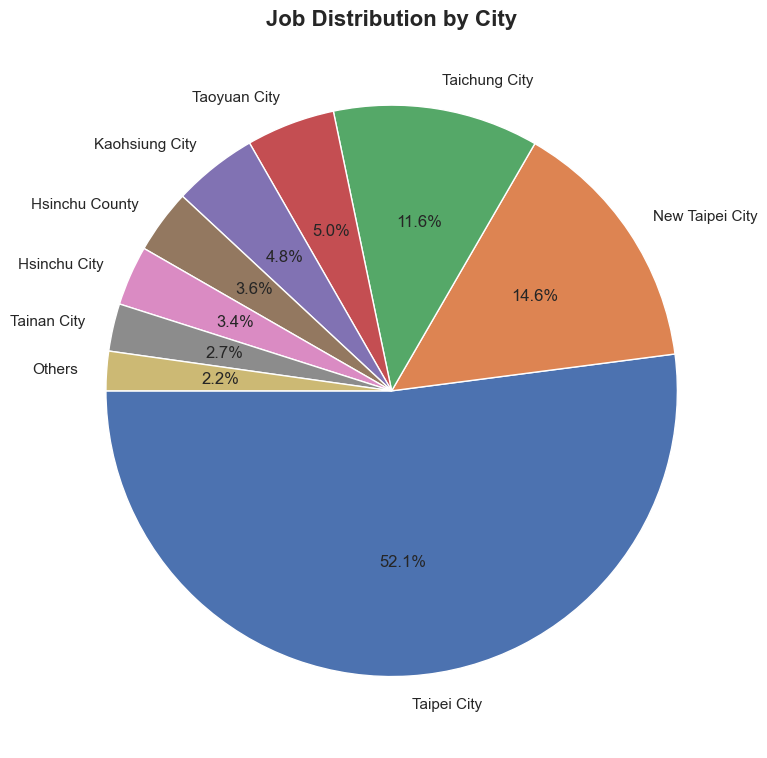

In [2]:
# Pie Chart: jobAddrNoDesc_en distribution
city_counts = df["jobAddrNoDesc_en"].value_counts()
top_n = 8
city_top = city_counts[:top_n]
city_other = city_counts[top_n:].sum()

city_combined = city_top.copy()
city_combined["Others"] = city_other

plt.figure(figsize=(8, 8))
plt.pie(city_combined, labels=city_combined.index, autopct='%1.1f%%', startangle=180)
plt.title("Job Distribution by City", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

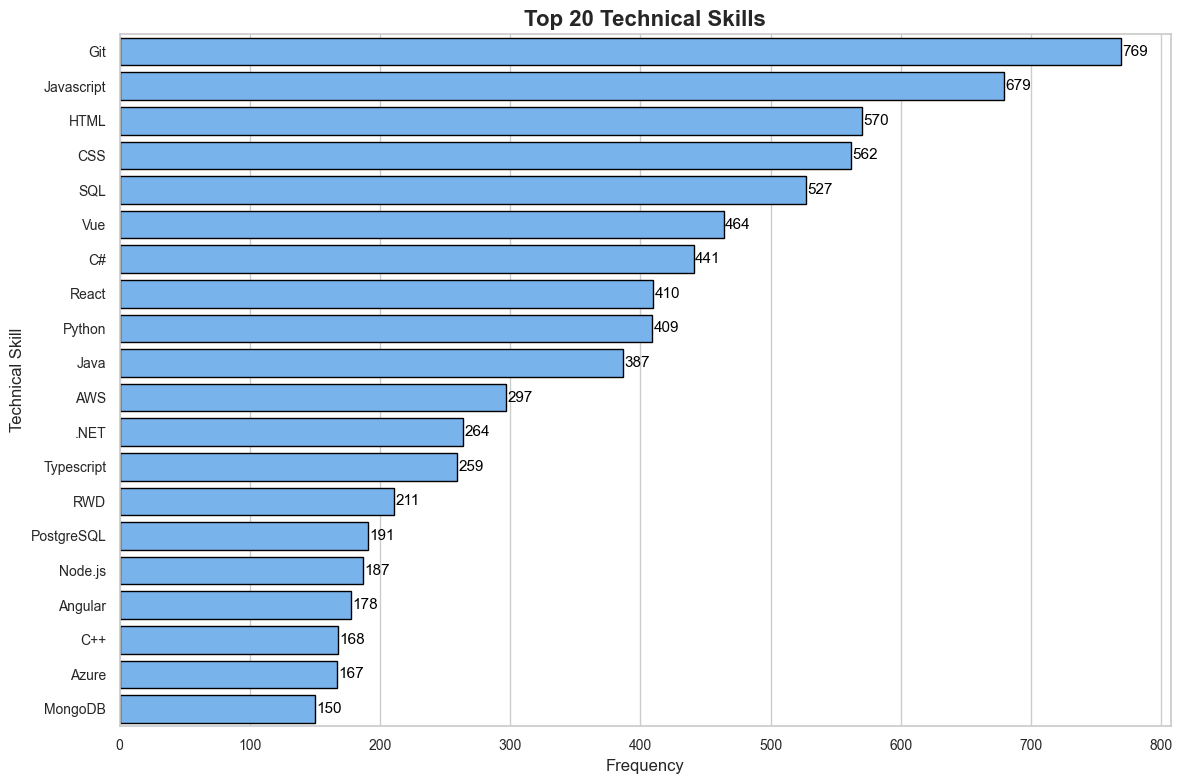

In [3]:
# Bar Chart: tech_skills using matplotlib
skill_list = []
for skills in df["tech_skills"].dropna():
    skill_list.extend([s.strip() for s in skills.split(",") if s.strip()])

skill_counts = Counter(skill_list)
common_skills = skill_counts.most_common(20)
skills_df = pd.DataFrame(common_skills, columns=["Skill", "Count"])

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

bars = sns.barplot(x="Count", y="Skill", data=skills_df, color="#66b3ff", edgecolor="black")

for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    plt.text(width + 1,
             bar.get_y() + bar.get_height() / 2,
             f'{int(width)}', va='center', fontsize=11, color='black')

plt.title("Top 20 Technical Skills", fontsize=16, weight='bold')
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Technical Skill", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

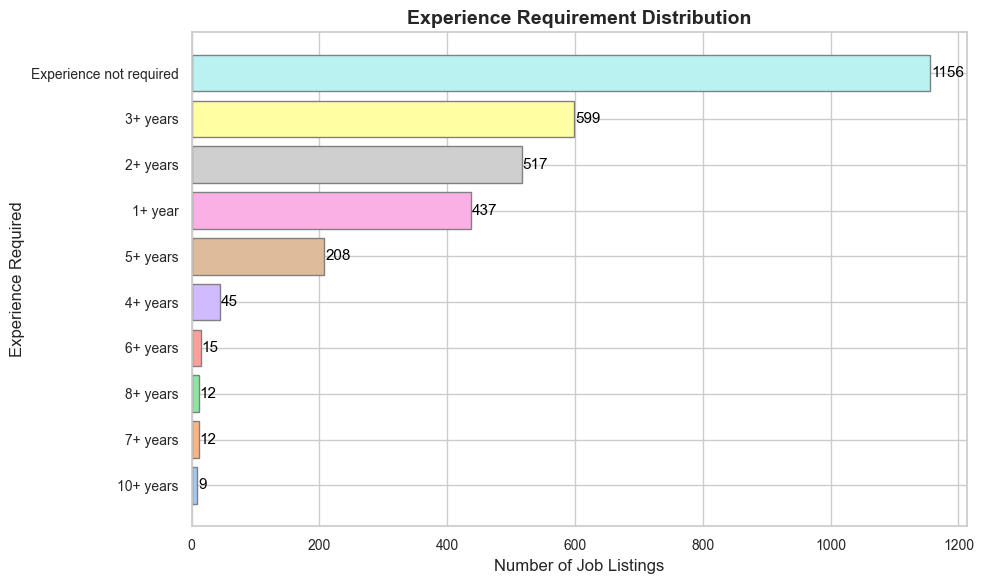

In [4]:
# Bar Chart: periodDesc_en using matplotlib
period_counts = df["periodDesc_en"].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel")[0:len(period_counts)]
bars = plt.barh(period_counts.index, period_counts.values, color=colors, edgecolor="gray")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 1,
             bar.get_y() + bar.get_height() / 2,
             f'{int(width)}', va='center', fontsize=11, color='black')

plt.title("Experience Requirement Distribution", fontsize=14, weight='bold')
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Experience Required", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

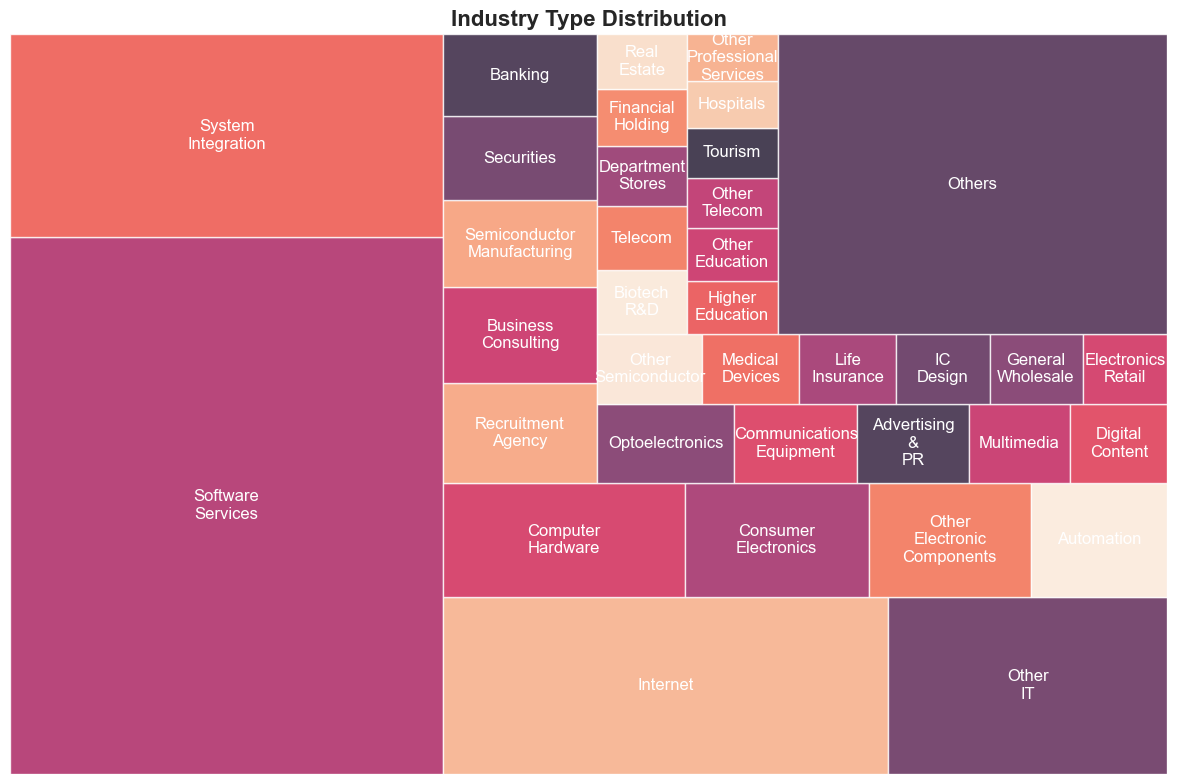

In [5]:
# Treemap: coIndustryDesc_en
industry_counts = df["coIndustryDesc_en"].value_counts()
top_n = 35
industry_top = industry_counts[:top_n]
industry_other = industry_counts[top_n:].sum()

industry_combined = industry_top.copy()
industry_combined["Others"] = industry_other

labels = [label.replace(' ', '\n') for label in industry_combined.index]

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=industry_combined.values,
    label=labels,
    alpha=0.8,
    text_kwargs={'color': 'white'}
)
plt.axis('off')
plt.title("Industry Type Distribution", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

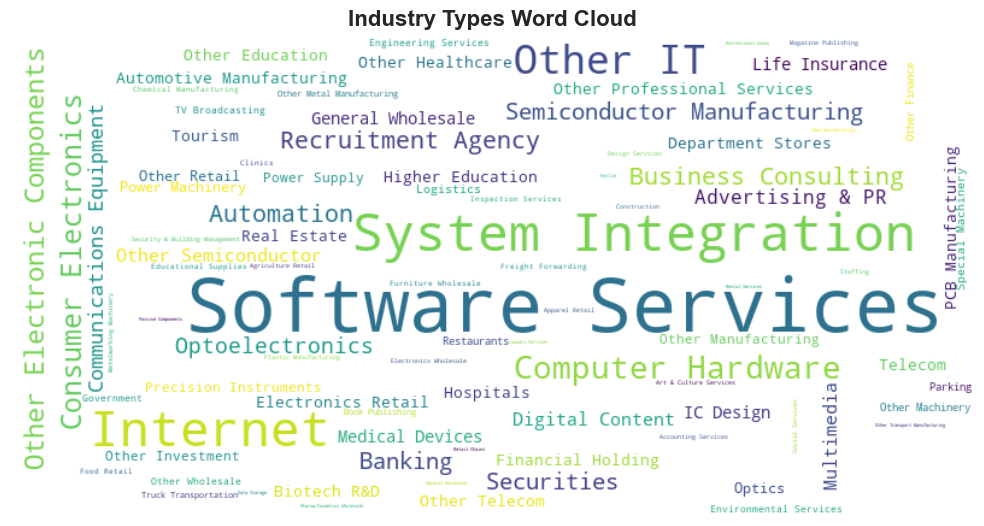

In [6]:
# Word Cloud: coIndustryDesc_en
industry_freq = industry_counts.to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(industry_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Industry Types Word Cloud", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

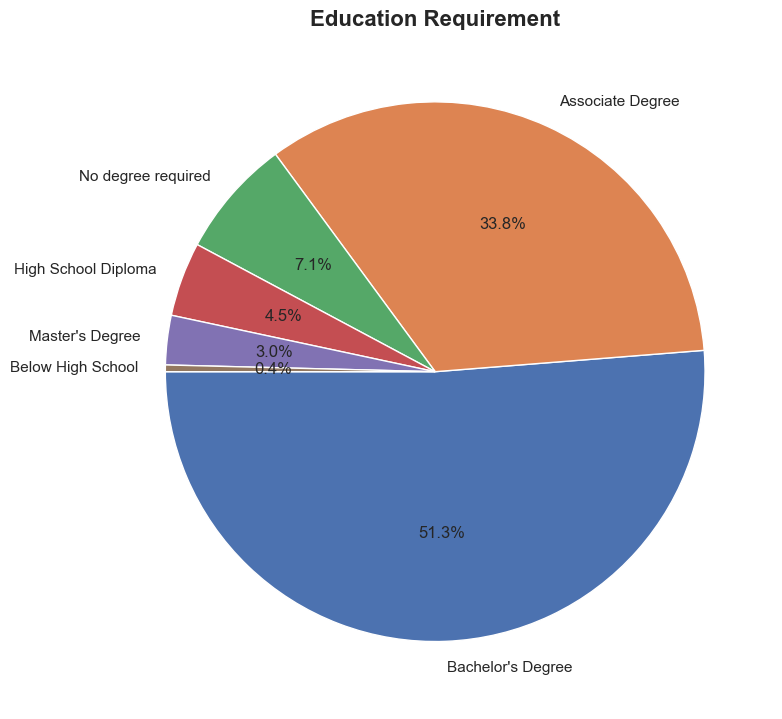

In [7]:
# Pie Chart: optionEdu_en
edu_counts = df["optionEdu_en"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(edu_counts, labels=edu_counts.index, autopct='%1.1f%%', startangle=180)
plt.title("Education Requirement", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

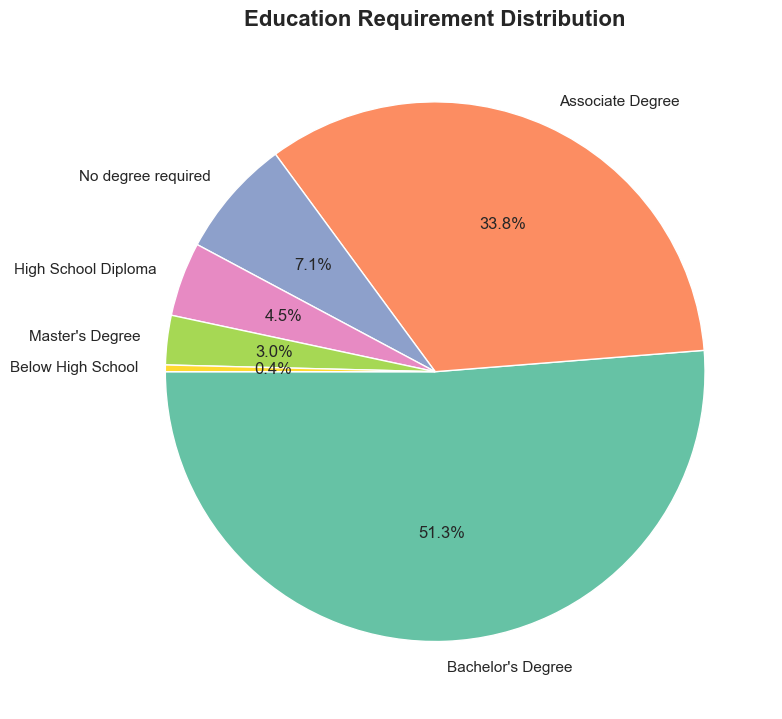

In [8]:
# Pie Chart: optionEdu_en
edu_counts = df["optionEdu_en"].value_counts()
plt.figure(figsize=(8, 8))
colors = sns.color_palette("Set2")[0:len(edu_counts)]
plt.pie(edu_counts, labels=edu_counts.index, autopct='%1.1f%%', startangle=180, colors=colors)  
plt.title("Education Requirement Distribution", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

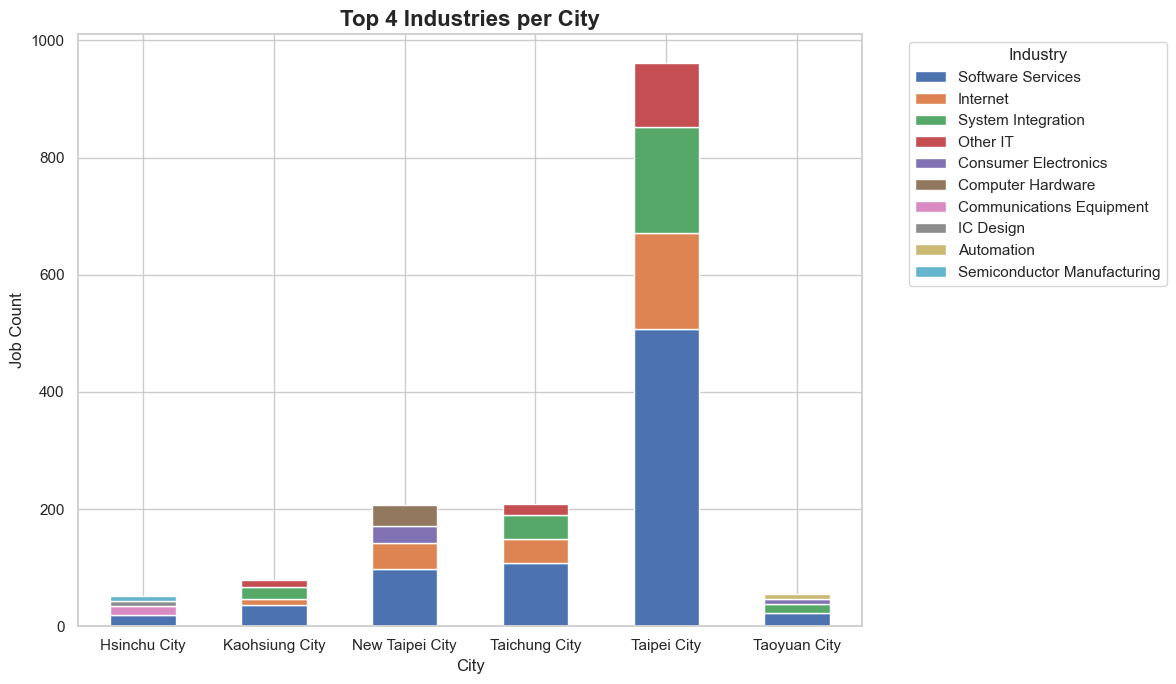

In [9]:
# Stacked Bar: top 4 industries in selected cities
target_cities = ["Taipei City", "New Taipei City", "Taichung City", "Hsinchu City", "Taoyuan City", "Kaohsiung City"]
city_industry = df[df["jobAddrNoDesc_en"].isin(target_cities)]

stacked_data = (
    city_industry.groupby(["jobAddrNoDesc_en", "coIndustryDesc_en"])
    .size()
    .reset_index(name="Count")
)

city_top_industries = []
for city in target_cities:
    city_group = stacked_data[stacked_data["jobAddrNoDesc_en"] == city]
    top4 = city_group.sort_values("Count", ascending=False).head(4)
    top4_sorted = top4.sort_values("Count", ascending=True)
    city_top_industries.append(top4_sorted)

top_industries = pd.concat(city_top_industries, ignore_index=True)

pivot_data = top_industries.pivot(index="jobAddrNoDesc_en", columns="coIndustryDesc_en", values="Count").fillna(0)
pivot_data = pivot_data[sorted(pivot_data.columns, key=lambda col: pivot_data[col].sum(), reverse=True)]

pivot_data.plot(kind="bar", stacked=True, figsize=(12, 7), rot=0)
plt.title("Top 4 Industries per City", fontsize=16, weight='bold')
plt.ylabel("Job Count")
plt.xlabel("City")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()